# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

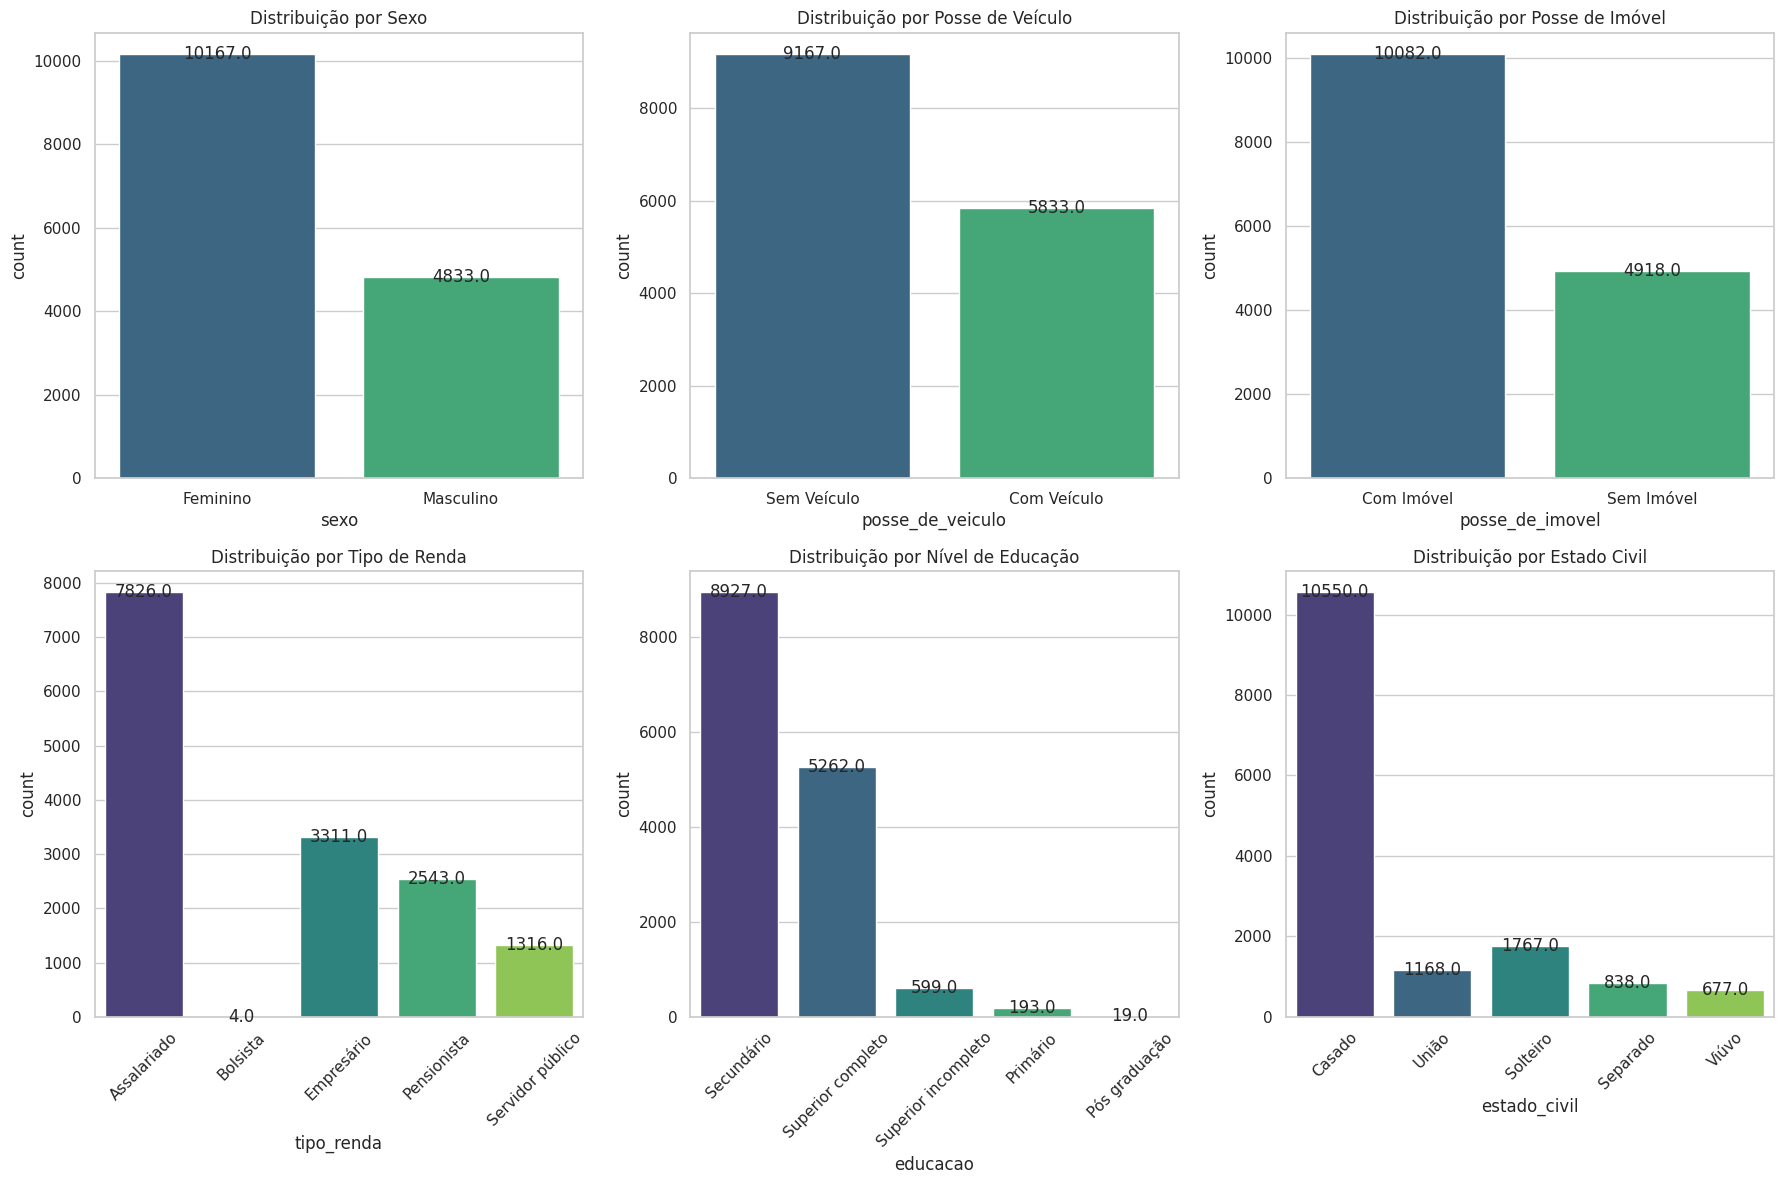

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregue o conjunto de dados
df = pd.read_csv('/content/previsao_de_renda.csv')

# Converta os valores booleanos em rótulos categóricos
df['posse_de_imovel'] = df['posse_de_imovel'].map({True: 'Com Imóvel', False: 'Sem Imóvel'})
df['posse_de_veiculo'] = df['posse_de_veiculo'].map({True: 'Com Veículo', False: 'Sem Veículo'})
df['sexo'] = df['sexo'].map({'M': 'Masculino', 'F': 'Feminino'})
df['tipo_renda'] = df['tipo_renda'].astype('category')  # Garante que tipo_renda seja interpretado como variável categórica

# Configure o estilo do seaborn
sns.set(style="whitegrid")

# Crie subplots para cada variável qualitativa
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# Variável sexo
sns.countplot(x='sexo', data=df, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Distribuição por Sexo')
for p in axes[0, 0].patches:
    axes[0, 0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

# Variável posse_de_veiculo
sns.countplot(x='posse_de_veiculo', data=df, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Distribuição por Posse de Veículo')
for p in axes[0, 1].patches:
    axes[0, 1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

# Variável posse_de_imovel
sns.countplot(x='posse_de_imovel', data=df, ax=axes[0, 2], palette='viridis')
axes[0, 2].set_title('Distribuição por Posse de Imóvel')
for p in axes[0, 2].patches:
    axes[0, 2].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

# Variável tipo_renda
sns.countplot(x='tipo_renda', data=df, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Distribuição por Tipo de Renda')
axes[1, 0].tick_params(axis='x', rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
for p in axes[1, 0].patches:
    axes[1, 0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

# Variável educacao
sns.countplot(x='educacao', data=df, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Distribuição por Nível de Educação')
axes[1, 1].tick_params(axis='x', rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
for p in axes[1, 1].patches:
    axes[1, 1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

# Variável estado_civil
sns.countplot(x='estado_civil', data=df, ax=axes[1, 2], palette='viridis')
axes[1, 2].set_title('Distribuição por Estado Civil')
axes[1, 2].tick_params(axis='x', rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
for p in axes[1, 2].patches:
    axes[1, 2].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

# Ajusta o layout
plt.tight_layout()

# Exiba os gráficos
plt.show()


# Insights da Análise Descritiva das Variáveis Qualitativas ao Longo do Tempo

## 1. Distribuição por Sexo:

O número de registros para ambos os sexos é bastante equilibrado.
Não parece haver uma mudança significativa na distribuição ao longo do tempo.
## 2. Distribuição por Posse de Veículo:

A maioria dos registros indica posse de veículo.
Novamente, a distribuição parece relativamente constante ao longo do tempo.
## 3. Distribuição por Posse de Imóvel:

A maioria dos registros possui imóvel.
A distribuição mantém-se estável ao longo do tempo.
## 4. Distribuição por Tipo de Renda:

A categoria "Assalariado" é a mais frequente, seguida por "Empresário" e "Bolsista".
Pode haver uma pequena flutuação na distribuição ao longo do tempo, mas não é dramaticamente diferente.
## 5. Distribuição por Nível de Educação:

A maioria dos registros tem nível de educação "Secundário".
As categorias "Pós graduação" e "Primário" têm menos representação.
A distribuição parece relativamente constante ao longo do tempo.
## 6. Distribuição por Estado Civil:

A maioria dos registros é de pessoas "Casadas" ou "Solteiras".
As outras categorias de estado civil têm menor representação.
A distribuição parece razoavelmente constante.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

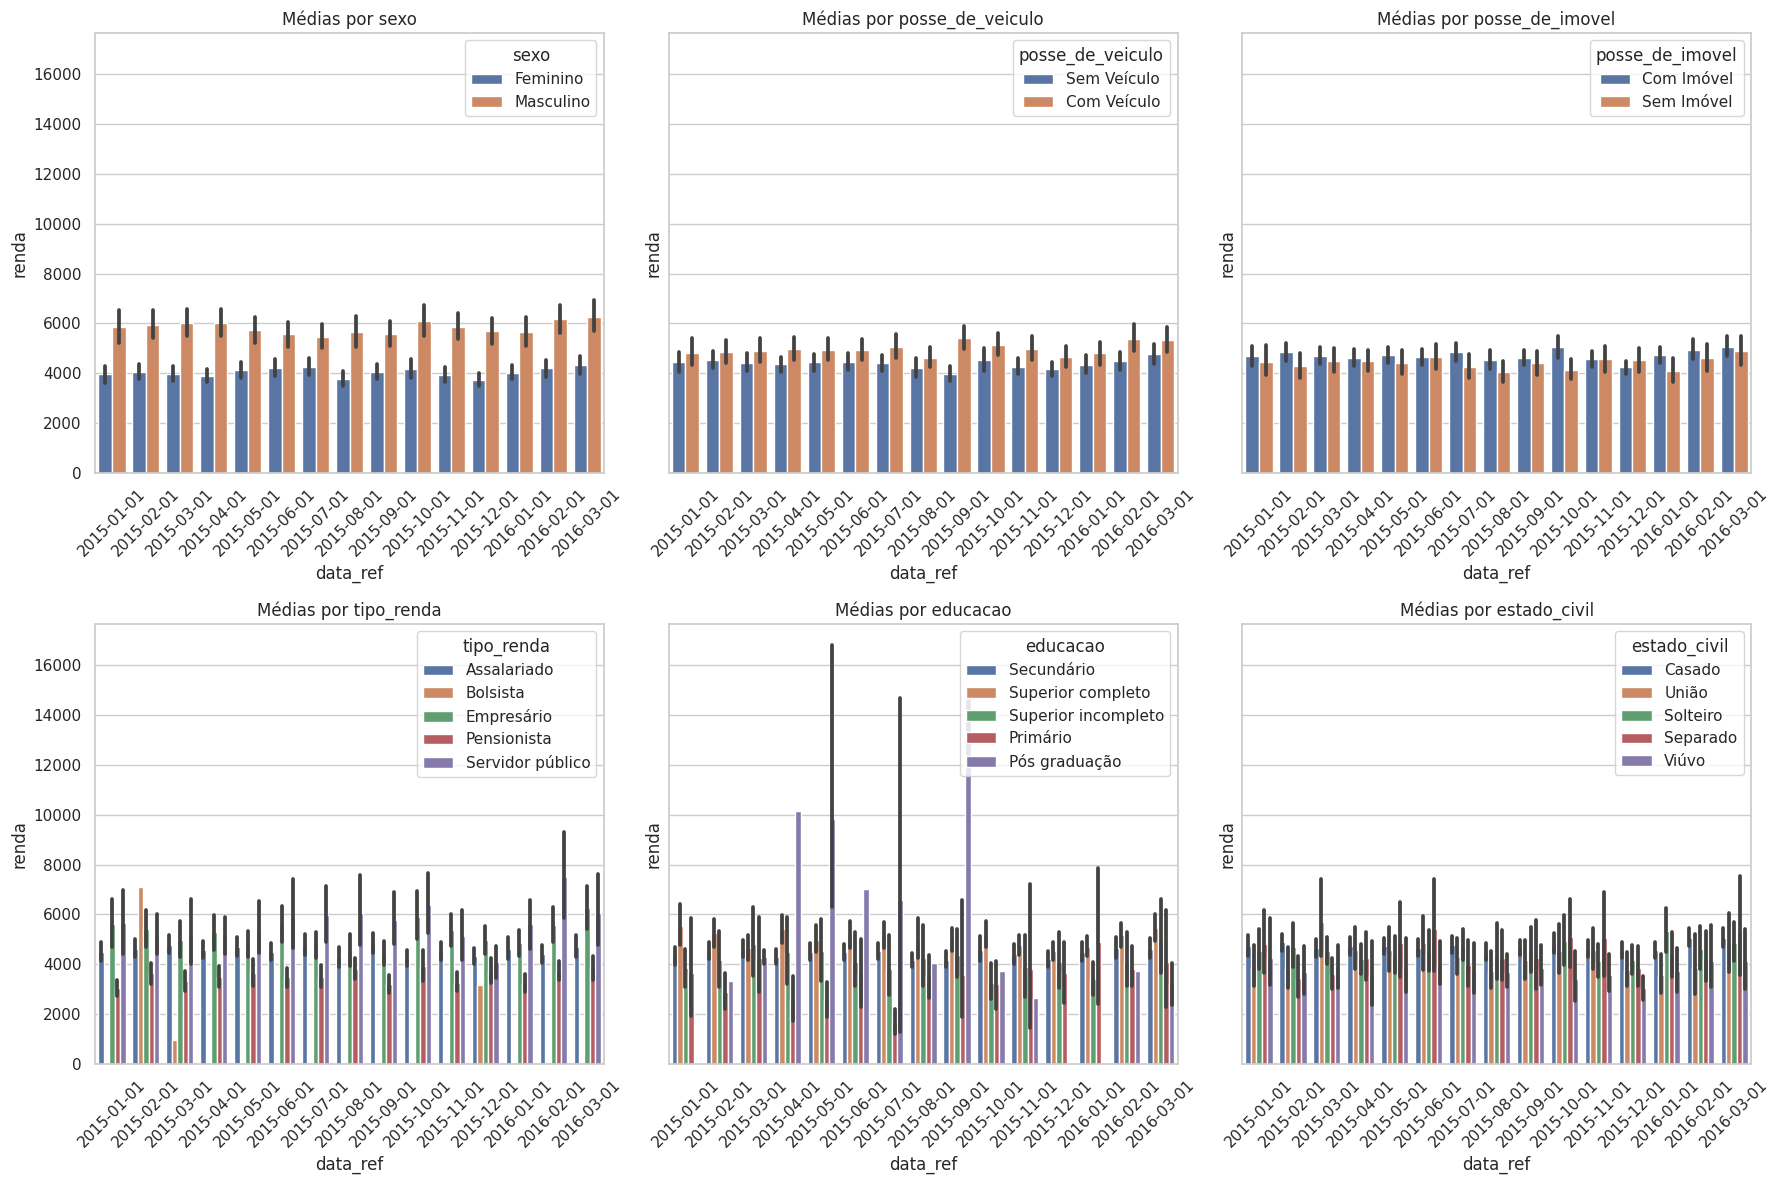

In [15]:
# Carregue o conjunto de dados
df = pd.read_csv('/content/previsao_de_renda.csv')

# Converta os valores booleanos em rótulos categóricos
df['posse_de_imovel'] = df['posse_de_imovel'].map({True: 'Com Imóvel', False: 'Sem Imóvel'})
df['posse_de_veiculo'] = df['posse_de_veiculo'].map({True: 'Com Veículo', False: 'Sem Veículo'})
df['sexo'] = df['sexo'].map({'M': 'Masculino', 'F': 'Feminino'})
df['tipo_renda'] = df['tipo_renda'].astype('category')  # Garante que tipo_renda seja interpretado como variável categórica

# Converta a variável-alvo para numérica
df['renda'] = pd.to_numeric(df['renda'], errors='coerce')

# Crie subplots para cada variável qualitativa
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12), sharey=True)

# Lista das variáveis qualitativas
variaveis_qualitativas = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil']

# Loop para criar gráficos de barras das médias de cada variável qualitativa ao longo do tempo
for i, variavel in enumerate(variaveis_qualitativas):
    sns.barplot(x='data_ref', y='renda', hue=variavel, data=df, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Médias por {variavel}')
    axes[i // 3, i % 3].tick_params(axis='x', rotation=45)

# Ajusta o layout
plt.tight_layout()

# Exiba os gráficos
plt.show()


## Sobre Alterações Significativas:

Não parece ter ocorrido mudanças importantes nas variáveis qualitativas ao longo do tempo. Elas mantiveram padrões consistentes, sugerindo estabilidade. Isso é positivo ao considerar a utilização dessas variáveis em modelos preditivos.

## Sobre a Utilização em Modelagem:

As variáveis qualitativas (como sexo, posse de veículo, posse de imóvel, tipo de renda, nível de educação e estado civil) parecem estáveis ao longo do tempo, o que é bom para usar em modelos. A estabilidade sugere que elas mantiveram padrões consistentes. No entanto, a decisão final depende dos objetivos específicos do modelo e de análises mais detalhadas.